In [1]:
import numpy as np #For Linear Algebraic Functions
import pandas as pd #For Data Handling

#For Logistic Regression
from sklearn import linear_model

#for random numbers
from random import randrange

import warnings
warnings.filterwarnings("ignore")

#Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading CSV Files

X_train = np.genfromtxt("./xtrain2.csv" , delimiter = ",")
Y_train=np.genfromtxt("./ytrain2.csv" , delimiter = ",")
codes=pd.read_csv("./codes.csv")

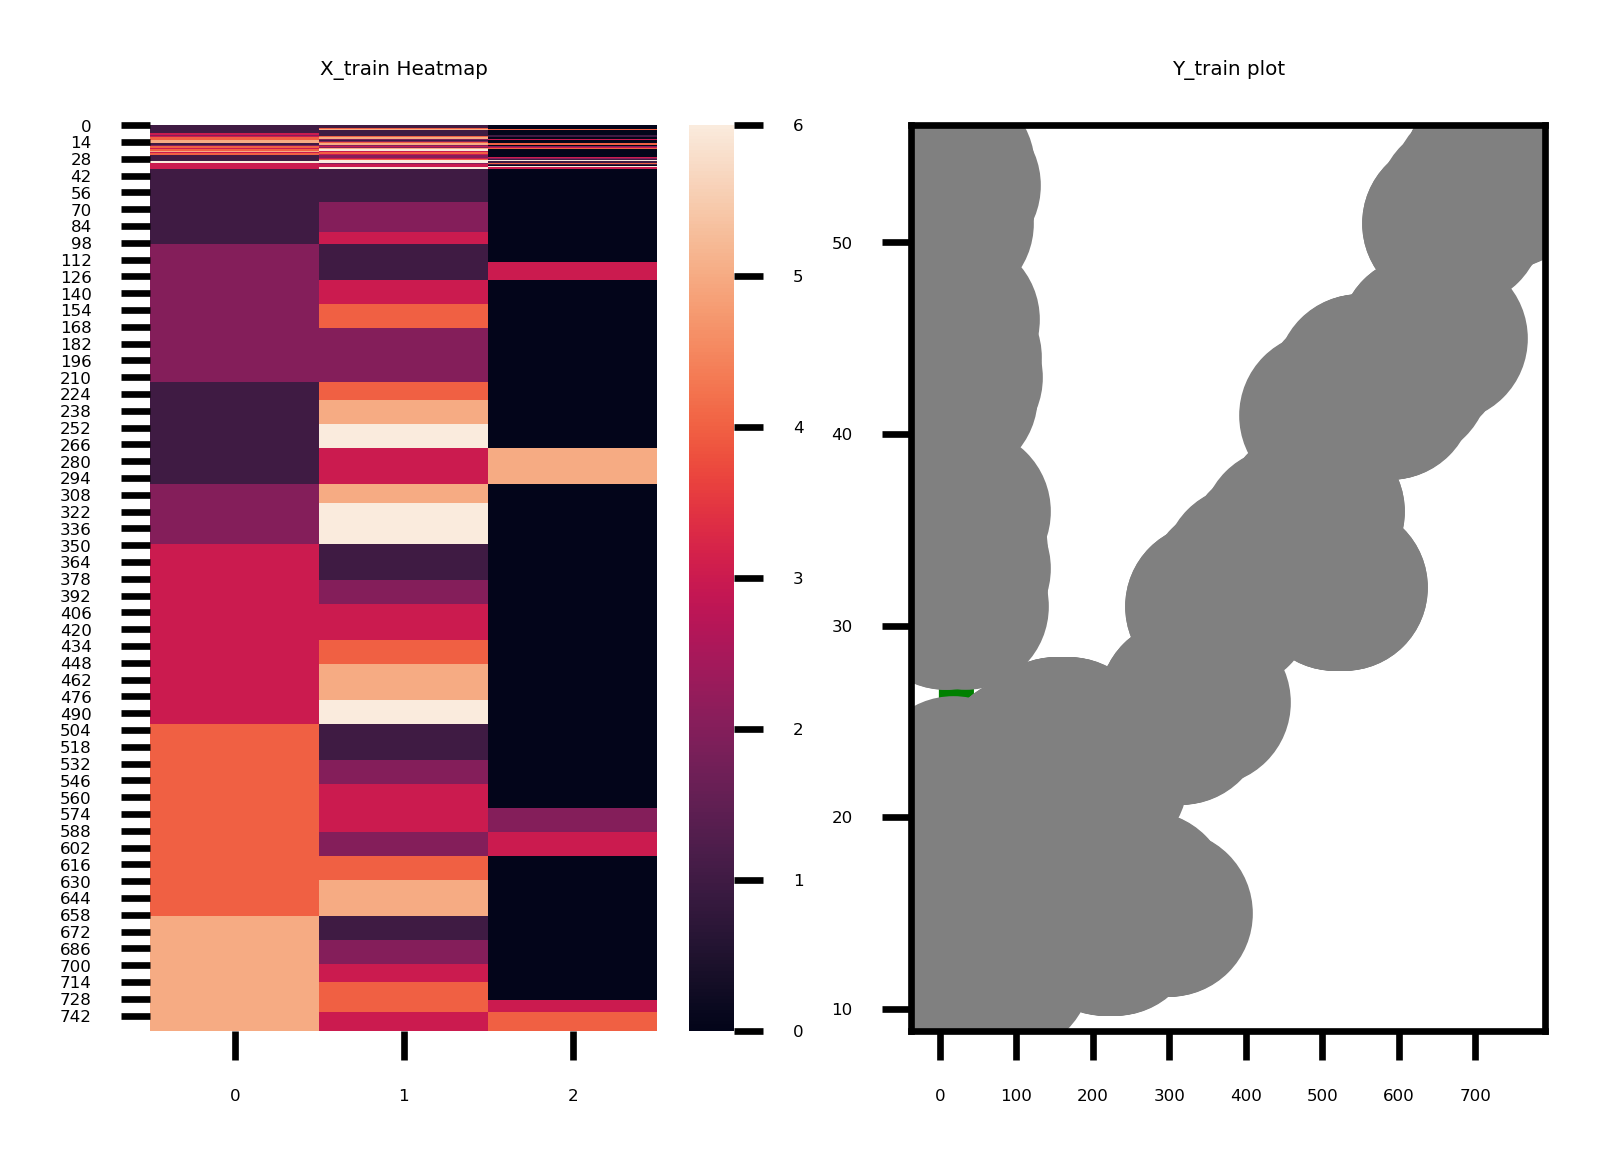

In [3]:
fig=plt.figure(figsize=(3, 2), dpi= 600, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 2})
plt.subplot(1,2,1)
plot=sns.heatmap(X_train)
plt.title("X_train Heatmap")
plt.subplot(1,2,2)
plt.plot(Y_train,marker='o', color='green',markerfacecolor='grey', markersize=20,mec='none')
plt.title("Y_train plot")
plt.show()

In [4]:
logreg=linear_model.LogisticRegression()
logreg.fit(X_train,Y_train);
# Y_predict=logreg.predict(X_test)

In [5]:
code=codes[['code']]
name=codes[['name']]
code=np.array(code)
name=np.array(name)

In [6]:
# def input_string():
#     name_of_item=input()
#     return name_of_item;

In [7]:
def input_function(length,input_string):
    input_test=[]
    name_of_item=input_string
    flag=0

    for  i in range(len(code)):
        if name_of_item==name[i]:
            flag+=1
#             print(i);
            number=i
            if flag==0:
                print('not found')
    if flag!=0:   
        code_of_item=int(code[number])
#         print(code_of_item)

        code_digits=[int(i) for i in str(code_of_item)]
#         print(code_digits)


        for i in range(length):
            x=code_digits[i]
            input_test.append(x)

        input_test_array=np.array(input_test)
        input_test_array_1 = np.c_[input_test_array , np.ones(len(input_test_array))]


        input_test_array_transpose=np.ndarray.transpose(input_test_array_1)

        input_test_array_transpose = input_test_array_transpose.astype(float)
        Y_pred=logreg.predict(input_test_array_transpose)
        Y_pred=np.array(Y_pred)
        Y_pred=Y_pred[0]
        input_test_array_transpose=input_test_array_transpose[0]
#         plt.plot(input_test_array_transpose,marker='o', color='green',markerfacecolor='grey', markersize=20,mec='none')
#         plt.legend()
#         plt.show()
        return Y_pred,input_test_array_transpose;
    else:
        print('not found')

In [8]:
def recommended_items(Y_pred,input_string):
    path="./recommended_items/" + str(Y_pred)+ ".csv"
#     print(path)
    recommended_item_list=pd.read_csv(path)
    recommended_item_list=np.array(recommended_item_list)
    name_of_item=input_string
    
    for i in range(len(recommended_item_list)):
        if name_of_item== recommended_item_list[i]:
            index=i
            recommended_item_list = np.delete(recommended_item_list, index)
            break
    
    return recommended_item_list

In [11]:
ans='n'
length=3;
input_string=input();
Y_pred,input_test_array_transpose=input_function(length,input_string);
Y_pred=int(Y_pred)
print("recommended items are :-\n")

recommended_items_list=recommended_items(Y_pred,input_string)
print(recommended_items_list)
# print(input_test_array_transpose)
ans= input("do you want to continue  ")
while ans=='y':
    input_string=input();
    Y_pred,input_test_array_transpose=input_function(length,input_string);
    Y_pred=int(Y_pred)
    recommended_items_list=recommended_items(Y_pred,input_string)
    print(recommended_items_list)
#     print(input_test_array_transpose)
    ans= input("do you want to continue  ")

cabbage
recommended items are :-

['onion' 'pasta' 'macroni' 'maggi magic masala' 'mayannaise' 'soya sauce'
 'tomato ketchup' 'mustard sauce' 'chilli sauce']
do you want to continue  sauce
